# Air Quality Summer School Data Analysis


# Part 1 [With Python (jupyter notebook)]
This note is to help participants work with some air quality data by cleaning and preprocessing the data before visualizing
to understand what the air quality is within some areas

This is divided into different sections. The first part of the work is preprocessing(cleaning) of the data into
a structure that will be easy to MINE for information
This code was put together by:

Cosmos Senyo Wemegah (UENR-EORIC)

James Nimoh (UG-AFRISET)

Victoria Owusu-Tawaih (CAF)

Various section of the code can be adopted and used for other purposes.
Please do not open or edit the codes in CLEANING_FUNCTION and AQI_FUNCTION unless you understand what you are doing with the code. A change in these might affect other portions of the code.

# We wish to simply run the first 2 cells to install some R packages we will need later. The packages are qute sizeable and may take approximately 5 - 10 minutes to completely install. So run this cell quite early enough.

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
#devtools::install_github("leeper/rio")
#devtools::install_github("davidcarslaw/openair")
#devtools::install_github("tidyverse/tidyverse")

These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                         
2: CRAN packages only          
3: None                        
4: utf8 (1.2.3 -> 1.2.4) [CRAN]
5: bit  (4.0.4 -> 4.0.5) [CRAN]
6: curl (5.0.2 -> 5.1.0) [CRAN]



Exception ignored from cffi callback <function _consoleread at 0x7b755fec1750>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rpy2/rinterface_lib/callbacks.py", line 66, in _consoleread
    reply = consoleread(s)
  File "/usr/local/lib/python3.10/dist-packages/rpy2/rinterface_lib/callbacks.py", line 52, in consoleread
    return input(prompt)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 851, in raw_input
    return self._input_request(str(prompt),
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 895, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

(as ‘lib’ is unspecified)






















	‘/tmp/RtmpbNk9Rh/downloaded_packages’



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpbNk9Rh/remotes1f260453ab8/gesistsa-rio-d8242fb/DESCRIPTION’ ... OK
* preparing ‘rio’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rio_1.0.2.tar.gz’



(as ‘lib’ is unspecified)




These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

1: All                         
2: CRAN packages only          
3: None                        
4: utf8 (1.2.3 -> 1.2.4) [CRAN]
5: bit  (4.0.4 -> 4.0.5) [CRAN]



Exception ignored from cffi callback <function _consoleread at 0x7b755fec1750>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/rpy2/rinterface_lib/callbacks.py", line 66, in _consoleread
    reply = consoleread(s)
  File "/usr/local/lib/python3.10/dist-packages/rpy2/rinterface_lib/callbacks.py", line 52, in consoleread
    return input(prompt)
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 851, in raw_input
    return self._input_request(str(prompt),
  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 895, in _input_request
    raise KeyboardInterrupt("Interrupted by user") from None
KeyboardInterrupt: Interrupted by user

(as ‘lib’ is unspecified)




















































	‘/tmp/RtmpbNk9Rh/downloaded_packages’



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpbNk9Rh/remotes1f245caa5d3/davidcarslaw-openair-7621ec9/DESCRIPTION’ ... OK
* preparing ‘openair’:
* checking DESCRIPTION meta-information ... OK
* cleaning src
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘openair_2.18-1.tar.gz’



(as ‘lib’ is unspecified)




These packages have more recent versions available.
It is recommended to update all of them.
Which would you like to update?

 1: All                                
 2: CRAN packages only                 
 3: None                               
 4: utf8        (1.2.3 -> 1.2.4) [CRAN]
 5: openssl     (2.0.6 -> 2.1.1) [CRAN]
 6: curl        (5.0.2 -> 5.1.0) [CRAN]
 7: highr       (0.9   -> 0.10 ) [CRAN]
 8: bit         (4.0.4 -> 4.0.5) [CRAN]
 9: gargle      (1.5.1 -> 1.5.2) [CRAN]
10: textshaping (0.3.6 -> 0.3.7) [CRAN]
11: isoband     (0.2.6 -> 0.2.7) [CRAN]
12: ragg        (1.2.5 -> 1.2.6) [CRAN]
13: dbplyr      (2.3.4 -> 2.4.0) [CRAN]



**Helper Functions** please do not edit any of the line codes within the function space

In [ ]:
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300



#=============================================================================
#=========== CALCULATING THE AIR QUALITY INDEX ===============================
#=============================================================================

#============ creating columns for computing the air quality index ==========================
#met_aq_data[['SO2','NOx','NH3','CO','O3']] = np.nan          #creating other pollutants columns
#==========================sub-index calculation of AQI======================================

# PM2.5 sub-index
calc_PM25_sub_indx = lambda x: (x * 50 / 30) if x<=30 else (50 + (x - 30) * 50 / 30) if x<=60 \
else (100 + (x - 60) * 100 / 30) if x <= 90 else (200 + (x - 90) * 100 / 30) if x<=120 else \
(300 + (x - 120) * 100 / 130) if x <= 250 else (400 + (x - 250) * 100 / 130) if x>250 else 0

#met_aq_data["PM2.5_sub_indx"] = met_aq_data["PM2.5_CF1_ug/m3"].apply(lambda x: calc_PM25_sub_indx(x))


# PM10.0 sub-index
calc_PM10_sub_indx = lambda x: x if x<=100 else (100 + (x - 100) * 100 / 150) if x<=250 else (200 + (x - 250)) \
if x<=350 else (300 + (x - 350) * 100 / 80) if x<=430 else (400 + (x - 430) * 100 / 80) if x>430 else 0

#met_aq_data["PM10_sub_indx"] = met_aq_data["PM10_CF1_ug/m3"].apply(lambda x: calc_PM10_sub_indx(x))


# SO2 sub-index
calc_SO2_sub_indx = lambda x: (x * 50 / 40) if x<=40 else (50 + (x - 40) * 50 / 40) if x<=80 \
else (100 + (x - 80) * 100 / 300) if x<=380 else (200 + (x - 380) * 100 / 420) if x<=800 \
else (300 + (x - 800) * 100 / 800) if x<=1600 else (400 + (x - 1600) * 100 / 800) if x>1600 else 0

#met_aq_data["SO2_sub_indx"] = met_aq_data["SO2"].apply(lambda x: calc_SO2_sub_indx(x))


# NOx sub-index
calc_NOx_sub_indx = lambda x: (x * 50 / 40) if x<=40 else (50 + (x - 40) * 50 / 40) if x<=80 else (100 + (x - 80) * 100 / 100) if x<=180 \
else (200 + (x - 180) * 100 / 100) if x<=280 else (300 + (x - 280) * 100 / 120) if x<=400 else (400 + (x - 400) * 100 / 120) if x>400 else 0


#met_aq_data["NOx_sub_indx"] = met_aq_data["NOx"].apply(lambda x: calc_NOx_sub_indx(x))


#NH3 sub-index
calc_NH3_sub_indx = lambda x: (x * 50 / 200) if x<=200 else (50 + (x - 200) * 50 / 200) if x<=400 else (100 + (x - 400) * 100 / 400) if x<=800 \
else (200 + (x - 800) * 100 / 400) if x<=1200 else (300 + (x - 1200) * 100 / 600) if x<=1800 else (400 + (x - 1800) * 100 / 600) if x>1800 else 0

#met_aq_data["NH3_sub_indx"] = met_aq_data["NH3"].apply(lambda x: calc_NH3_sub_indx(x))


## CO Sub-Index calculation
calc_CO_sub_indx = lambda x: (x * 50 / 1) if x<=1 else (50 + (x - 1) * 50 / 1) if x<=2 else (100 + (x - 2) * 100 / 8) if x<=10 else \
(200 + (x - 10) * 100 / 7) if x<=17 else (300 + (x - 17) * 100 / 17) if x<=34 else (400 + (x - 34) * 100 / 17) if x>34 else 0

#met_aq_data["CO_sub_indx"] = met_aq_data["CO"].apply(lambda x: calc_CO_sub_indx(x))


## O3 Sub-Index calculation
calc_O3_sub_indx = lambda x: (x * 50 / 50) if x<=50 else (50 + (x - 50) * 50 / 50) if x<=100 else (100 + (x - 100) * 100 / 68) if x<=168 else \
(200 + (x - 168) * 100 / 40) if x<=208 else (300 + (x - 208) * 100 / 539) if x<=748 else (400 + (x - 400) * 100 / 539) if x>748 else 0

#met_aq_data["O3_sub_indx"] = met_aq_data["O3"].apply(lambda x: calc_O3_sub_indx(x))


def sub_index_calculation(aq_data):
    aq_data["PM2.5_sub_indx"] = aq_data["PM2.5_ug/m3"].apply(lambda x: calc_PM25_sub_indx(x))
    aq_data["PM10_sub_indx"] = aq_data["PM10_ug/m3"].apply(lambda x: calc_PM10_sub_indx(x))
    aq_data["SO2_sub_indx"] = aq_data["SO2"].apply(lambda x: calc_SO2_sub_indx(x))
    aq_data["NOx_sub_indx"] = aq_data["NOx"].apply(lambda x: calc_NOx_sub_indx(x))
    aq_data["NH3_sub_indx"] = aq_data["NH3"].apply(lambda x: calc_NH3_sub_indx(x))
    aq_data["CO_sub_indx"] = aq_data["CO"].apply(lambda x: calc_CO_sub_indx(x))
    aq_data["O3_sub_indx"] = aq_data["O3"].apply(lambda x: calc_O3_sub_indx(x))
    return aq_data


def apply_aq_checks(aq_data):
    aq_data['Checks'] = (aq_data["PM2.5_sub_indx"] > 0).astype(int) + \
    (aq_data["PM10_sub_indx"] > 0).astype(int) + \
    (aq_data["SO2_sub_indx"] > 0).astype(int) + \
    (aq_data["NOx_sub_indx"] > 0).astype(int) + \
    (aq_data["NH3_sub_indx"] > 0).astype(int) + \
    (aq_data["CO_sub_indx"] > 0).astype(int) + \
    (aq_data["O3_sub_indx"] > 0).astype(int)
    return aq_data



def apply_aqi_calculation(aq_data):
    aq_data['calculated_AQI'] = round(aq_data[["PM2.5_sub_indx", "PM10_sub_indx",
                   "SO2_sub_indx", "NOx_sub_indx",
                   "NH3_sub_indx", "CO_sub_indx", "O3_sub_indx"]].max(axis = 1))
    aq_data.loc[aq_data["PM2.5_sub_indx"] + aq_data["PM10_sub_indx"] <= 0, "calculated_AQI"] = np.NaN
    aq_data.loc[aq_data.Checks < 2, "calculated_AQI"] = np.NaN  #<3 indicates atleast 3 inputs else returns NaN (can be changed to suit choice)
    return aq_data





## AQI bucketing
categorize_AQI = lambda x: "Good" if x<=50 else "Moderate" if x<=100 else "Unhealthy for Sensitive Groups" if x<=150 else "Unhealthy" if x<=200 \
else "Very Unhealthy" if x<=300 else "Hazardous" if x>300 else np.nan






#=============================================================================
#===========    DATA   CLEANING   FUNCTIONS    ===============================
#=============================================================================

#creating functions needed for cleaning the data

#winds conversion from miles per hour (mph) to metres per sec(mps)
def wind_mph_to_mps(wind_data):
    mps_wind = (wind_data/2.237) # convert from mph to m/s and adding it to a new colums
    return mps_wind

# averaging pm data for 2
def avg_pms_of_2(pm_1st_data, pm_2nd_data):
    avg_pm = (pm_1st_data+pm_2nd_data)/2
    return avg_pm

#some datasets may have '+' in the time component
#removing "+" in date tiime and selecting date range to work with
def work_on_time(csv_data,start_date_time, end_date_time):
    csv_data.index = csv_data.index.tz_localize(None) # removes the '+' in the date time
    csv_data_2020 = csv_data.loc[start_date_time:end_date_time]
    return csv_data_2020

#conversion from Fahrenheit temperature into Celsius
def Fahren_2_Celcius(Fahren_data):
    celc_deci = (Fahren_data - 32) / 1.8
    celc_cal = round(celc_deci) #celc_cal = round(celc_deci,2) (for 2 deci point)
    return celc_cal

## correct pm2.5 data with factor of corretion (pm2.5 = 0.54[pm2.5_data_TTQ] + 1.5[TmpAVG] + 0.12[RH] - 47.33)
def correct_pm25(aq_data,raw_pm_column,temp_column,RH_column):
    pm25correct = ((0.54 * aq_data[raw_pm_column]) + (1.53 * aq_data[temp_column]) + (0.12 * aq_data[RH_column]) - 47.33)
    return pm25correct

def create_seasons(data,MOY_column):
    months = [1,2,3,4,5,6,7,8,9,10,11,12]
    seasons = ['winter','winter','spring','spring','spring',
         'summer','summer','summer','fall','fall','fall','winter']
    data["season"] = data[MOY_column].replace(months,seasons)
    return data

def calc_WIND_category16(wind_deg):
    deg = round(wind_deg,2)
    if deg >= 11.25 and deg < 33.75:
        return "NNE"
    elif deg >= 33.75 and deg < 56.25:
        return "NE"
    elif deg >= 56.25 and deg < 78.75:
        return "ENE"
    elif deg >= 78.75 and deg < 101.25:
        return "E"
    elif deg >= 101.25 and deg < 123.75:
        return "ESE"
    elif deg >= 123.75 and deg < 146.25:
        return "SE"
    elif deg >= 146.25 and deg < 168.75:
        return "SSE"
    elif deg >= 168.75 and deg < 191.25:
        return "S"
    elif deg >= 191.25 and deg < 213.75:
        return "SSW"
    elif deg >= 213.75 and deg < 236.25:
        return "SW"
    elif deg >= 236.25 and deg < 258.65:
        return "WSW"
    elif deg >= 258.65 and deg < 281.25:
        return "W"
    elif deg >= 281.25 and deg < 303.75:
        return "WNW"
    elif deg >= 303.75 and deg < 326.25:
        return "NW"
    elif deg >= 326.25 and deg < 348.75:
        return "NNW"
    else:
        return "N"


#===this function works for 8 cardinal points
def calc_WIND_category8(wind_deg):
    deg = round(wind_deg,1)
    if deg >= 22.5 and deg < 67.5:
        return "NE"
    elif deg >= 67.5 and deg < 112.5:
        return "E"
    elif deg >= 112.5 and deg < 157.5:
        return "SE"
    elif deg >= 157.5 and deg < 202.5:
        return "S"
    elif deg >= 202.5 and deg < 247.5:
        return "SW"
    elif deg >= 247.5 and deg < 292.5:
        return "W"
    elif deg >= 292.5 and deg < 337.5:
        return "NW"
    else:
        return "N"


## Data Preprocessing (Cleaning) and Restructuring

This section preprocess the data (both meteorological data and air quality data) into a form that will be used later

The line of code below will import the packages that will be require to do specific works in this section
Some functions has been developed for this purpose and therefore will be called into the system.
Please make sure a file name (CLEANING_FUNCTIONS) exist in your working folder.

In [ ]:
import pandas as pd
import numpy as np
import glob
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
from scipy.stats import spearmanr
from windrose import WindroseAxes
filterwarnings('ignore')

We are setting some paths for our analysis. The data is contained in the "DATA" folder, some images can be stored in the "IMAGE" folder. "in_data_path" is the path to the data while "out_data_path" is the path to store other data we may generate from this work.

In [ ]:
codepath = 'https://raw.githubusercontent.com/aqppssgh/2023-School/main/AQ_SS_PRACTICALS/CODING/'
in_data_path = 'https://raw.githubusercontent.com/aqppssgh/2023-School/main/AQ_SS_PRACTICALS/DATA/'

#in_data_path = '../DATA/'
out_data_path = 'DATA/CLEANED_DATA/'
image_path = 'IMAGES/'

import os
if os.path.exists(out_data_path)==False:
    os.makedirs(out_data_path)

if os.path.exists(image_path)==False:
    os.makedirs(image_path)

## Meteorological Data cleaning
The meteorological data will be worked on first. The data (EX_MET_DATA.csv is the filename of the meteorological data)is called in using the read_csv with some parameters set.

In [ ]:
met_data = pd.read_csv(in_data_path+'EX_MET_DATA.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['date_time'],index_col='date_time')

View the imported data to understand the structure and some variables contained in the data

In [ ]:
met_data.loc['2019-01']

,temperature,RH,wind_direc,wind_speed,windspd_mps
date_time,,,,,
2019-01-01 00:00:00,29.0,79.04,230.0,4.60,2.056325
2019-01-01 01:00:00,28.0,83.77,250.0,4.60,2.056325
2019-01-01 02:00:00,28.0,83.77,270.0,4.60,2.056325
2019-01-01 03:00:00,27.0,88.83,260.0,5.75,2.570407
2019-01-01 04:00:00,27.0,83.66,270.0,5.75,2.570407
...,...,...,...,...,...
2019-01-31 19:00:00,28.0,88.90,210.0,9.20,4.112651
2019-01-31 20:00:00,28.0,88.90,200.0,8.05,3.598570
2019-01-31 21:00:00,28.0,88.90,190.0,9.20,4.112651


Dropping some columns not needed. The lon, lat and elevation columns will not be used in this work so we can drop to reduce the number of columns we are working with.

In [ ]:
met_data = met_data.drop(columns=["lon","lat","elevation"])

The wind data is in miles-per-hour(mph) which will be converted to metres-per-seconds(mps) using the function "wind_mph_to_mps" which will require the windspeed column.

In [ ]:
met_data['windspd_mps'] = wind_mph_to_mps(met_data['wind_speed'])

Aggregate the data to form some daily and monthly data for use later if you wish (May not really be necessary for this work)
The data will be saved in an output as met_data_daily (daily data) and met_data_monthly (monthly data)

In [ ]:
met_data_daily = met_data.resample('D').mean()    #aggregating a daily data
met_data_monthly = met_data.resample('M').mean()  #aggregating a monthly data

met_data_daily.to_csv(out_data_path +'daily_met_output.csv') #saving output
met_data_monthly.to_csv(out_data_path +'monthly_met_output.csv') #saving output

Now lets continue with the real work. This practical section will only focus on the period with continues data.
We will select 1st January 2020 to 31st December 2020.
We will also drop the mph wind sicne we have converted it and view the new form of the data

In [ ]:
met_data_2020 = work_on_time(met_data,'2020-01-01','2020-12-31') # 2020 period
met_data_2020.drop(columns=['wind_speed'],inplace=True) #dropping column
met_data_2020

,temperature,RH,wind_direc,windspd_mps
date_time,,,,
2020-01-01 00:00:00,28.0,78.90,NaN,0.514081
2020-01-01 01:00:00,27.0,83.66,NaN,0.514081
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407
...,...,...,...,...
2020-12-30 19:00:00,28.0,88.90,180.0,3.084488
2020-12-30 20:00:00,28.0,88.90,180.0,3.084488
2020-12-30 21:00:00,28.0,88.90,180.0,2.570407


## Air Quality Data cleaning
Let us hold on with the meteorological data for now and move to the cleaning of the pollutant dataset.
This data is a purpleAir sensor data for 2 locations in Accra.
The code below reads in the various data sets. (For more information on the dataset please see facilitators later)

In [ ]:
ajo_data = pd.read_csv(in_data_path+'AJ_O.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['created_at'],index_col='created_at')
aju_data = pd.read_csv(in_data_path+'AJ_U.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['created_at'],index_col='created_at')
djo_data = pd.read_csv(in_data_path+'DJ_O.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['created_at'],index_col='created_at')
dju_data = pd.read_csv(in_data_path+'DJ_U.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['created_at'],index_col='created_at')

Uncomment (remove the # in front of each line - 1 at a time) each one to check the various columns of the data to work with and understand the data structure

In [ ]:
ajo_data
#aju_data
#djo_data
#dju_data

,site,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3
created_at,,,,,,,,,
2019-04-08 17:00:00+00:00,AJ_O,23.44,70.37,142.26,20.36,-46.82,70.36,28.15,48.03
2019-04-08 18:00:00+00:00,AJ_O,0.47,0.20,0.29,61.66,-45.52,74.79,25.52,0.20
2019-04-09 14:00:00+00:00,AJ_O,0.00,0.20,0.40,1.33,-47.67,67.33,29.33,0.20
2019-04-09 15:00:00+00:00,AJ_O,16.92,50.50,106.97,33.33,-48.20,74.89,23.31,34.13
2019-04-09 16:00:00+00:00,AJ_O,1.06,0.13,0.13,84.66,-47.84,80.56,19.78,0.13
...,...,...,...,...,...,...,...,...,...
2020-10-29 07:00:00+00:00,AJ_O,27.99,41.11,45.81,1183.93,-67.74,95.07,48.33,35.45
2020-10-29 08:00:00+00:00,AJ_O,14.22,19.70,22.62,1240.00,-67.56,101.92,38.84,19.65
2020-10-29 09:00:00+00:00,AJ_O,27.59,38.49,42.97,1308.00,-73.63,102.00,38.63,34.34


Application of some functions from this section
We will find some average at single location using "avg_pms_of_2". we will explain a few things here but nothing to worry about.

In [ ]:
ajo_data['pm25_avg'] = avg_pms_of_2(ajo_data['PM2.5_CF1_ug/m3'], aju_data['PM2.5_CF1_ug/m3'])
ajo_data['pm10_avg'] = avg_pms_of_2(ajo_data['PM10.0_CF1_ug/m3'], aju_data['PM10.0_CF1_ug/m3'])
djo_data['pm25_avg'] = avg_pms_of_2(djo_data['PM2.5_CF1_ug/m3'], dju_data['PM2.5_CF1_ug/m3'])
djo_data['pm10_avg'] = avg_pms_of_2(djo_data['PM10.0_CF1_ug/m3'], dju_data['PM10.0_CF1_ug/m3'])

After averaging, we will work on removing '+' in the datetime which will make it easier to work with the time component.
We will provide a date also for the data to be truncated within the study period for this practical section as we did to the meteorological data.
They (met and aq data) must have the same working period.

In [ ]:
ajo_data_2020 = work_on_time(ajo_data,'2020-01-01','2020-12-31')
djo_data_2020 = work_on_time(djo_data,'2020-01-01','2020-12-31')

The temperature column is in Fahrenheit and can be converted to celcius using a function (Fahren_2_Celcius). Dont worry about the warning.

In [ ]:
ajo_data_2020['Sens_temp'] = Fahren_2_Celcius(ajo_data['Temperature_F'])
djo_data_2020['Sens_temp'] = Fahren_2_Celcius(djo_data['Temperature_F'])

View the data now and lets drop some columns we may not need in this practical (uncomment each line -one at a time)

In [ ]:
#ajo_data_2020
djo_data_2020

,site,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,Temperature_F,Humidity_%,pm25_avg,pm10_avg,Sens_temp
created_at,,,,,,,,
2020-01-01 00:00:00,DJ_O,128.67,156.15,85.88,64.73,128.385,154.150,30.0
2020-01-01 01:00:00,DJ_O,155.85,189.71,84.97,65.97,155.200,186.100,29.0
2020-01-01 02:00:00,DJ_O,352.97,446.91,84.03,67.37,353.380,439.740,29.0
2020-01-01 03:00:00,DJ_O,501.81,651.49,82.57,70.37,501.425,637.005,28.0
2020-01-01 04:00:00,DJ_O,399.64,509.69,81.70,70.50,399.520,499.025,28.0
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,DJ_O,48.19,57.42,88.93,82.20,48.700,57.815,32.0
2020-12-31 20:00:00,DJ_O,52.62,63.55,88.80,84.50,53.140,63.010,32.0
2020-12-31 21:00:00,DJ_O,49.11,59.51,88.13,86.43,50.090,59.825,31.0


Lets drop some columns now. The other line of codes will concatenate (something like merge) the two data and lets have view to see the new form of the data (we will depend on this as data covering Accra which may not be real representation). Mind you this is only giving you a hands-on and how to work around similar data sets.

In [ ]:
ajo_data_2020.drop(columns=['PM1.0_CF1_ug/m3','UptimeMinutes','RSSI_dbm','PM2.5_ATM_ug/m3'],inplace=True)
djo_data_2020.drop(columns=['PM1.0_CF1_ug/m3','UptimeMinutes','RSSI_dbm','PM2.5_ATM_ug/m3'],inplace=True)

#concat
pm25_data = pd.concat([ajo_data_2020['pm25_avg'], djo_data_2020['pm25_avg']], axis=1) #merges the data with different dates/index
pm25_data = pm25_data.mean(axis=1)
pm25_data

created_at
2020-01-01 00:00:00    128.385
2020-01-01 01:00:00    155.200
2020-01-01 02:00:00    353.380
2020-01-01 03:00:00    501.425
2020-01-01 04:00:00    399.520
                        ...   
2020-12-31 19:00:00     48.700
2020-12-31 20:00:00     53.140
2020-12-31 21:00:00     50.090
2020-12-31 22:00:00     58.965
2020-12-31 23:00:00     62.295
Freq: H, Length: 8784, dtype: float64

We will do same for the PM10, the sensor temperature data and RH data

In [ ]:
pm10_data = pd.concat([ajo_data_2020['pm10_avg'], djo_data_2020['pm10_avg']], axis=1) #merges the data with different dates/index
pm10_data = pm10_data.mean(axis=1)
#pm10_data

#finding average sensor based temperature for area
sensor_temp_data = pd.concat([ajo_data_2020['Sens_temp'], djo_data_2020['Sens_temp']], axis=1) #merges the data with different dates/index
sensor_temp_data = sensor_temp_data.mean(axis=1)
#sensor_temp_data

#finding average sensor based RH for area
sensor_RH_data = pd.concat([ajo_data_2020['Humidity_%'], djo_data_2020['Humidity_%']], axis=1) #merges the data with different dates/index
sensor_RH_data = sensor_RH_data.mean(axis=1)
#sensor_RH_data

## Secondary Wind Data
Let us leave the others for now and clean our wind data (reanalysis data).
The data was in "u10" and "v10" components and the wind speed and direction has been computed already.
The code below import the data and makes a view of it

In [ ]:
wind_data = pd.read_csv(in_data_path+'EX_Wind_Data.csv', na_values=[-99.9, -9.99, -9999, 'M'], parse_dates=['Time'],index_col='Time')
wind_data

,u10,v10,ws,wd
Time,,,,
2020-01-01 00:00:00,0.7577,0.2754,0.8062,250
2020-01-01 01:00:00,0.7894,-0.3005,0.8447,291
2020-01-01 02:00:00,0.7199,-0.3395,0.7959,295
2020-01-01 03:00:00,0.9917,-0.4053,1.0713,292
2020-01-01 04:00:00,1.1494,-0.5144,1.2593,294
...,...,...,...,...
2021-08-31 19:00:00,2.0306,1.3691,2.4490,236
2021-08-31 20:00:00,1.9370,1.1279,2.2415,240
2021-08-31 21:00:00,2.2398,0.9674,2.4398,247


The U10 and v10 columns can be dropped since it has already been used to calculate the wind speed and direction.
After dropping, some sorting is done the we have the wind data cleaned.

In [ ]:
wind_data = wind_data.drop(columns=['u10','v10'])
wind_data = wind_data.sort_values('Time', ascending=True)
wind_data

,ws,wd
Time,,
2020-01-01 00:00:00,0.8062,250
2020-01-01 01:00:00,0.8447,291
2020-01-01 02:00:00,0.7959,295
2020-01-01 03:00:00,1.0713,292
2020-01-01 04:00:00,1.2593,294
...,...,...
2021-12-08 19:00:00,3.5403,194
2021-12-08 20:00:00,3.2158,200
2021-12-08 21:00:00,3.1259,208


The wind direction is in degrees and needs to be converted to the direction itself.
We can have a view of it after.
The fucntions to use have 2 forms: the 8 cardinal points (the function is calc_WIND_category8) and 16 cardinal points (the function is calc_WIND_category8).

In [ ]:
wind_data['direction'] = wind_data["wd"].apply(lambda x: calc_WIND_category8(x))
wind_data[~wind_data.wd.isna()].head(13)

,ws,wd,direction
Time,,,
2020-01-01 00:00:00,0.8062,250,W
2020-01-01 01:00:00,0.8447,291,W
2020-01-01 02:00:00,0.7959,295,NW
2020-01-01 03:00:00,1.0713,292,W
2020-01-01 04:00:00,1.2593,294,NW
2020-01-01 05:00:00,1.4755,302,NW
2020-01-01 06:00:00,1.6149,307,NW
2020-01-01 07:00:00,1.7298,306,NW
2020-01-01 08:00:00,1.7282,305,NW


In [ ]:
##===========aggregating data to month and day ==========================================
wind_daily = wind_data.resample('D').mean()    #aggregating a daily data
wind_monthly = wind_data.resample('M').mean()  #aggregating a monthly data

In [ ]:
#======saving the output (this might be useful but i have commented it out) ====================
wind_daily.to_csv(out_data_path +'wind_data_daily.csv')
wind_monthly.to_csv(out_data_path +'wind_data_monthly.csv')

Do a selection of the time period here

In [ ]:
wind_data_2020 = work_on_time(wind_data,'2020-01-01','2020-12-31')
wind_data_2020

,ws,wd,direction
Time,,,
2020-01-01 00:00:00,0.8062,250,W
2020-01-01 01:00:00,0.8447,291,W
2020-01-01 02:00:00,0.7959,295,NW
2020-01-01 03:00:00,1.0713,292,W
2020-01-01 04:00:00,1.2593,294,NW
...,...,...,...
2020-12-31 19:00:00,3.3918,195,S
2020-12-31 20:00:00,2.9545,204,SW
2020-12-31 21:00:00,2.6188,218,SW


## Check the cleaned datasets
Now that we have cleaned all the data and restructure them, let us view them and be sure of what we are dealing with
Uncomment them one at a time and run to see the output
The met data, pm2.5 data, pm10 data, Temperature and RH from Sensor, wind speed and direction and from reanalysis data

In [ ]:

#met_data_2020
#pm25_data
#pm10_data
#sensor_temp_data
#sensor_RH_data
#wind_data_2020

In [ ]:
#indirect merging of all the available dataset
#we will create new columns in the met data
#then we will add the required datasets

cleaned_met_aq = met_data_2020
cleaned_met_aq['uncorrected_pm25'],cleaned_met_aq['pm10_avg'] = pm25_data,pm10_data
cleaned_met_aq['sens_temp'],cleaned_met_aq['sens_RH'] = sensor_temp_data,sensor_RH_data
cleaned_met_aq['windspeed'],cleaned_met_aq['wd'],cleaned_met_aq['direction'] = wind_data_2020.ws,wind_data_2020.wd,wind_data_2020.direction

cleaned_met_aq

,temperature,RH,wind_direc,windspd_mps,uncorrected_pm25,pm10_avg,sens_temp,sens_RH,windspeed,wd,direction
date_time,,,,,,,,,,,
2020-01-01 00:00:00,28.0,78.90,NaN,0.514081,128.385,154.150,30.0,64.73,0.8062,250,W
2020-01-01 01:00:00,27.0,83.66,NaN,0.514081,155.200,186.100,29.0,65.97,0.8447,291,W
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325,353.380,439.740,29.0,67.37,0.7959,295,NW
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407,501.425,637.005,28.0,70.37,1.0713,292,W
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407,399.520,499.025,28.0,70.50,1.2593,294,NW
...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,28.0,88.90,180.0,3.084488,66.400,74.590,32.0,83.00,3.2235,183,S
2020-12-30 20:00:00,28.0,88.90,180.0,3.084488,65.315,72.815,32.0,87.40,2.9339,189,S
2020-12-30 21:00:00,28.0,88.90,180.0,2.570407,79.690,90.675,31.0,91.60,2.5759,195,S


In [ ]:
#checking for missing data in RHs and temperatures
#cleaned_met_aq[['RH','sens_RH']].isnull().any(), cleaned_met_aq[['temperature','sens_temp']].isnull().any()

**Correcting the pm2.5 data**
I know this is a long practice for us but we are making a big progress. Now to correct the pm2.5 with the correction factor call the function to work (correct_pm25). This requires input from the data, the pm column temperature and RH columns.

In [ ]:
cleaned_met_aq['pm25_avg'] = correct_pm25(cleaned_met_aq,'uncorrected_pm25','sens_temp','sens_RH')
cleaned_met_aq

,temperature,RH,wind_direc,windspd_mps,uncorrected_pm25,pm10_avg,sens_temp,sens_RH,windspeed,wd,direction,pm25_avg
date_time,,,,,,,,,,,,
2020-01-01 00:00:00,28.0,78.90,NaN,0.514081,128.385,154.150,30.0,64.73,0.8062,250,W,75.6655
2020-01-01 01:00:00,27.0,83.66,NaN,0.514081,155.200,186.100,29.0,65.97,0.8447,291,W,88.7644
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325,353.380,439.740,29.0,67.37,0.7959,295,NW,195.9496
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407,501.425,637.005,28.0,70.37,1.0713,292,W,274.7239
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407,399.520,499.025,28.0,70.50,1.2593,294,NW,219.7108
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,28.0,88.90,180.0,3.084488,66.400,74.590,32.0,83.00,3.2235,183,S,47.4460
2020-12-30 20:00:00,28.0,88.90,180.0,3.084488,65.315,72.815,32.0,87.40,2.9339,189,S,47.3881
2020-12-30 21:00:00,28.0,88.90,180.0,2.570407,79.690,90.675,31.0,91.60,2.5759,195,S,54.1246


Now that this is the corrected pm data. We can do a comparison to see the difference in the two. However this is optional and can be done on your free time. compare the corrected and uncorrected pm25 and discuss your observation.

<Axes: xlabel='date_time'>

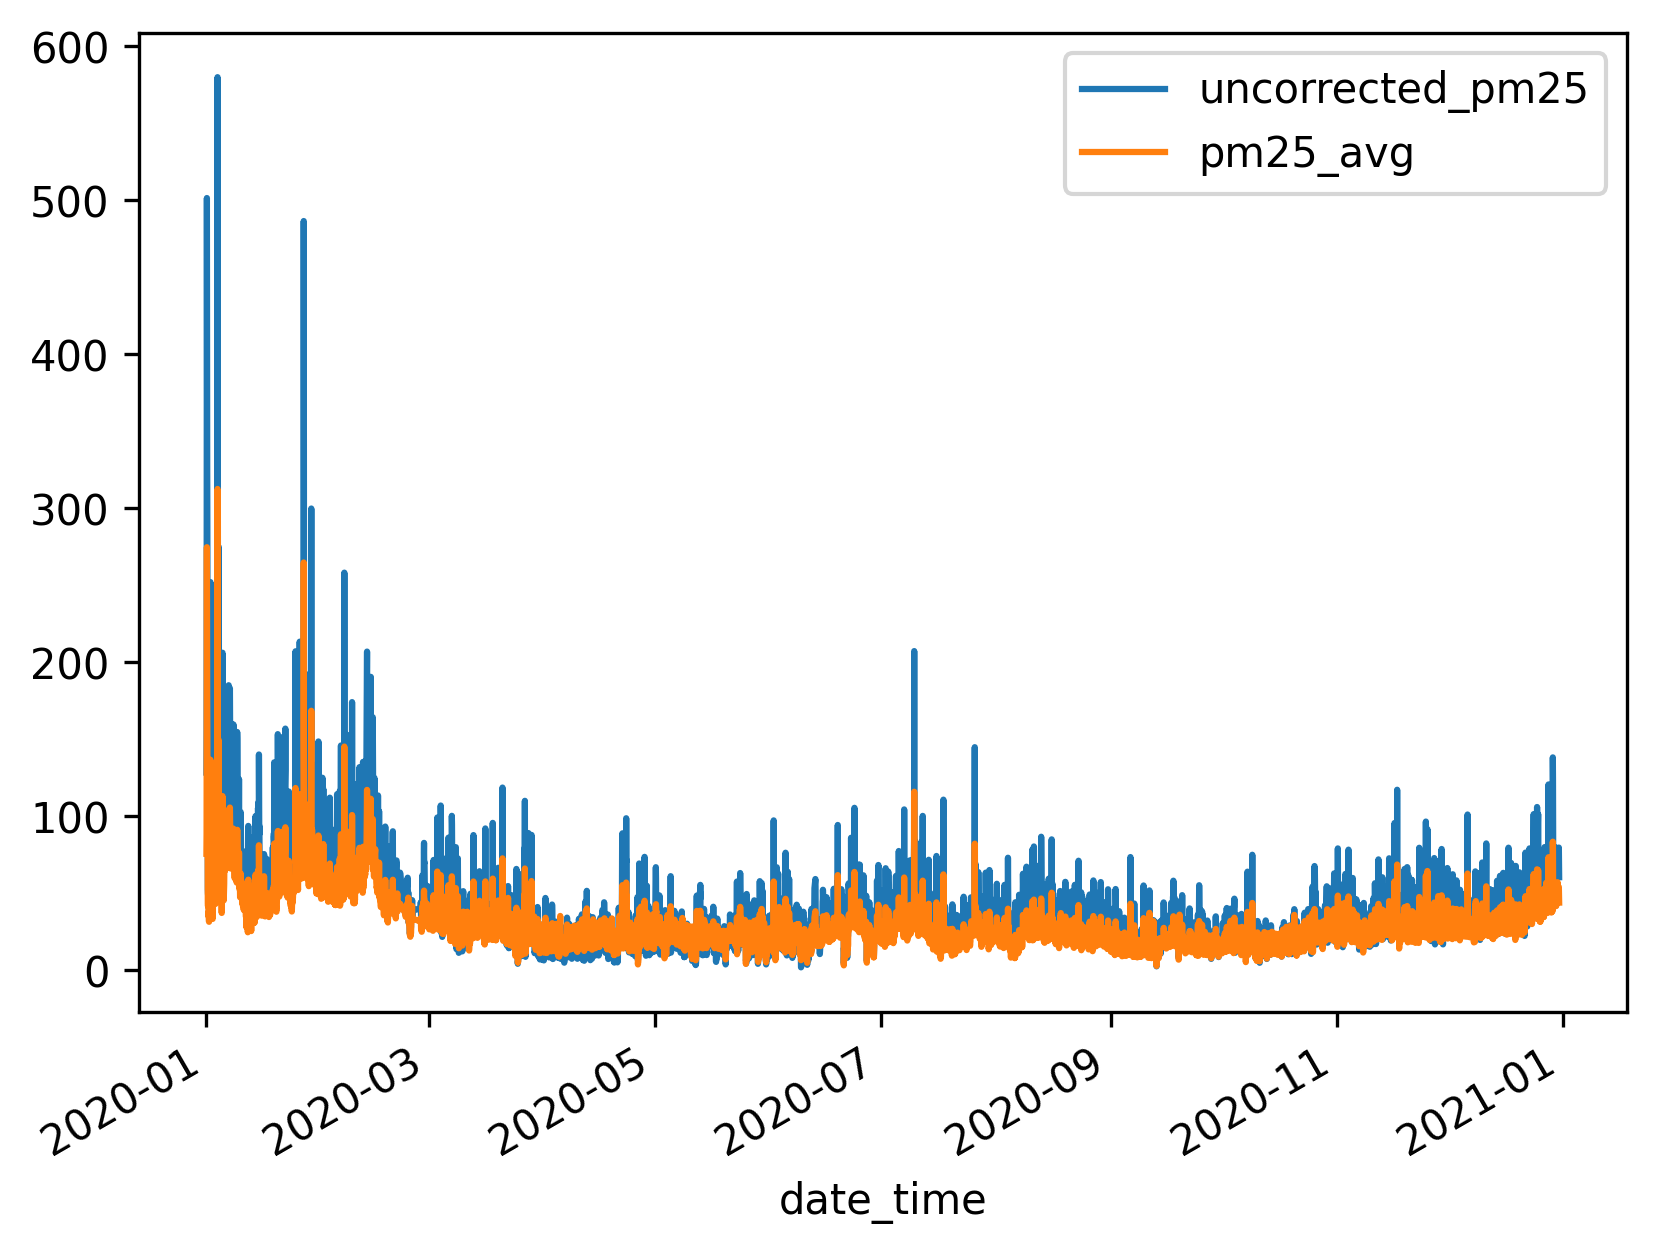

In [ ]:
cleaned_met_aq[['uncorrected_pm25','pm25_avg']].plot()

We still need some columns to work around with and that will be done with the next line of codes.

In [ ]:
#========== creating columns for hour of day, day of month, month of year and season ====================
cleaned_met_aq['hour_of_day'] = cleaned_met_aq.index.hour       #creating hour of day
cleaned_met_aq['day_of_month'] = cleaned_met_aq.index.day       #creating day of month
cleaned_met_aq['day_of_week'] = cleaned_met_aq.index.weekday       #creating day of week
cleaned_met_aq['month_of_year'] = cleaned_met_aq.index.month    #creating month of year
cleaned_met_aq['year'] = cleaned_met_aq.index.year    #creating month of year
cleaned_met_aq = create_seasons(cleaned_met_aq,'month_of_year') #creating season column

cleaned_met_aq

,year,season,month_of_year,day_of_week,day_of_month,hour_of_day,obs_temp,obs_RH,obs_wind_speed,obs_wind_direction,wind_direc,sensor_temp,sensor_RH,windspeed,direction,wd,PM2.5_ug/m3,PM10_ug/m3,uncorrected_pm25
date_time,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,winter,1,2,1,0,28.0,78.90,0.514081,NW,300.0,30.0,64.73,0.8062,W,250,75.6655,154.150,128.385
2020-01-01 01:00:00,2020,winter,1,2,1,1,27.0,83.66,0.514081,NW,300.0,29.0,65.97,0.8447,W,291,88.7644,186.100,155.200
2020-01-01 02:00:00,2020,winter,1,2,1,2,27.0,83.66,2.056325,NW,300.0,29.0,67.37,0.7959,NW,295,195.9496,439.740,353.380
2020-01-01 03:00:00,2020,winter,1,2,1,3,26.0,88.75,2.570407,W,280.0,28.0,70.37,1.0713,W,292,274.7239,637.005,501.425
2020-01-01 04:00:00,2020,winter,1,2,1,4,26.0,88.75,2.570407,W,270.0,28.0,70.50,1.2593,NW,294,219.7108,499.025,399.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,2020,winter,12,2,30,19,28.0,88.90,3.084488,S,180.0,32.0,83.00,3.2235,S,183,47.4460,74.590,66.400
2020-12-30 20:00:00,2020,winter,12,2,30,20,28.0,88.90,3.084488,S,180.0,32.0,87.40,2.9339,S,189,47.3881,72.815,65.315
2020-12-30 21:00:00,2020,winter,12,2,30,21,28.0,88.90,2.570407,S,180.0,31.0,91.60,2.5759,S,195,54.1246,90.675,79.690


For the purpose of this work, we will fill in the missing data gaps (They are just a few and will not affect the total dataset and it meaning in anyway) so we can work with easily. NB: Dont worry about the code.. if you want to understand the code for this, see facilitators after the session. The final output will tell us whether we still have missing datasets

In [ ]:
#working on missing data # the missing data was not much was it was filled using the forward and backward fill method
cleaned_met_aq.fillna(method='ffill',limit=2, inplace=True)
cleaned_met_aq.fillna(method='bfill',limit=2, inplace=True)
cleaned_met_aq.isnull().any()

temperature         False
RH                  False
wind_direc          False
windspd_mps         False
uncorrected_pm25    False
pm10_avg            False
sens_temp           False
sens_RH             False
windspeed           False
wd                  False
direction           False
pm25_avg            False
hour_of_day         False
day_of_month        False
day_of_week         False
month_of_year       False
year                False
season              False
dtype: bool

Now we will rename some columns for easy identification and use

In [ ]:
#now rename the columns to fit
cleaned_met_aq = cleaned_met_aq.rename(
    columns={
        "temperature":"obs_temp",
        "RH": "obs_RH",
        "windspd_mps": "obs_wind_speed",
        "pm10_avg": "PM10_ug/m3",
        "pm25_avg": "PM2.5_ug/m3",
        "sens_temp": "sensor_temp",
        "sens_RH": "sensor_RH",
    }
)

cleaned_met_aq

,obs_temp,obs_RH,wind_direc,obs_wind_speed,uncorrected_pm25,PM10_ug/m3,sensor_temp,sensor_RH,windspeed,wd,direction,PM2.5_ug/m3,hour_of_day,day_of_month,day_of_week,month_of_year,year,season
date_time,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,28.0,78.90,300.0,0.514081,128.385,154.150,30.0,64.73,0.8062,250,W,75.6655,0,1,2,1,2020,winter
2020-01-01 01:00:00,27.0,83.66,300.0,0.514081,155.200,186.100,29.0,65.97,0.8447,291,W,88.7644,1,1,2,1,2020,winter
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325,353.380,439.740,29.0,67.37,0.7959,295,NW,195.9496,2,1,2,1,2020,winter
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407,501.425,637.005,28.0,70.37,1.0713,292,W,274.7239,3,1,2,1,2020,winter
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407,399.520,499.025,28.0,70.50,1.2593,294,NW,219.7108,4,1,2,1,2020,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,28.0,88.90,180.0,3.084488,66.400,74.590,32.0,83.00,3.2235,183,S,47.4460,19,30,2,12,2020,winter
2020-12-30 20:00:00,28.0,88.90,180.0,3.084488,65.315,72.815,32.0,87.40,2.9339,189,S,47.3881,20,30,2,12,2020,winter
2020-12-30 21:00:00,28.0,88.90,180.0,2.570407,79.690,90.675,31.0,91.60,2.5759,195,S,54.1246,21,30,2,12,2020,winter


Run the next code, dont worry, it is another function work for the reanalysis wind direction and also rearrange the columns

In [ ]:
#====working on wind direction of gmet data ===
#change the wind function name to Wd_in_deg_2_cardinal
cleaned_met_aq["obs_wind_direction"] = cleaned_met_aq["wind_direc"].apply(lambda x: calc_WIND_category8(x))
cleaned_met_aq[~cleaned_met_aq.wind_direc.isna()].head(13)

,obs_temp,obs_RH,wind_direc,obs_wind_speed,uncorrected_pm25,PM10_ug/m3,sensor_temp,sensor_RH,windspeed,wd,direction,PM2.5_ug/m3,hour_of_day,day_of_month,day_of_week,month_of_year,year,season,obs_wind_direction
date_time,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,28.0,78.90,300.0,0.514081,128.385,154.150,30.0,64.73,0.8062,250,W,75.6655,0,1,2,1,2020,winter,NW
2020-01-01 01:00:00,27.0,83.66,300.0,0.514081,155.200,186.100,29.0,65.97,0.8447,291,W,88.7644,1,1,2,1,2020,winter,NW
2020-01-01 02:00:00,27.0,83.66,300.0,2.056325,353.380,439.740,29.0,67.37,0.7959,295,NW,195.9496,2,1,2,1,2020,winter,NW
2020-01-01 03:00:00,26.0,88.75,280.0,2.570407,501.425,637.005,28.0,70.37,1.0713,292,W,274.7239,3,1,2,1,2020,winter,W
2020-01-01 04:00:00,26.0,88.75,270.0,2.570407,399.520,499.025,28.0,70.50,1.2593,294,NW,219.7108,4,1,2,1,2020,winter,W
2020-01-01 05:00:00,25.0,88.67,280.0,2.570407,326.980,398.215,27.0,70.60,1.4755,302,NW,179.0212,5,1,2,1,2020,winter,W
2020-01-01 06:00:00,26.0,88.75,300.0,2.056325,286.010,341.330,28.0,68.81,1.6149,307,NW,158.2126,6,1,2,1,2020,winter,NW
2020-01-01 07:00:00,26.0,88.75,300.0,1.028163,185.835,220.540,32.0,60.47,1.7298,306,NW,109.2373,7,1,2,1,2020,winter,NW
2020-01-01 08:00:00,27.0,83.66,10.0,1.542244,84.230,101.365,35.0,51.20,1.7282,305,NW,57.8482,8,1,2,1,2020,winter,N


In [ ]:
# rearrange columns
cleaned_met_aq = cleaned_met_aq[['year','season','month_of_year','day_of_week',
                           'day_of_month','hour_of_day','obs_temp','obs_RH',
                           'obs_wind_speed','obs_wind_direction','wind_direc',
                           'sensor_temp','sensor_RH','windspeed','direction','wd',
                           'PM2.5_ug/m3','PM10_ug/m3','uncorrected_pm25']]

cleaned_met_aq

,year,season,month_of_year,day_of_week,day_of_month,hour_of_day,obs_temp,obs_RH,obs_wind_speed,obs_wind_direction,wind_direc,sensor_temp,sensor_RH,windspeed,direction,wd,PM2.5_ug/m3,PM10_ug/m3,uncorrected_pm25
date_time,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,winter,1,2,1,0,28.0,78.90,0.514081,NW,300.0,30.0,64.73,0.8062,W,250,75.6655,154.150,128.385
2020-01-01 01:00:00,2020,winter,1,2,1,1,27.0,83.66,0.514081,NW,300.0,29.0,65.97,0.8447,W,291,88.7644,186.100,155.200
2020-01-01 02:00:00,2020,winter,1,2,1,2,27.0,83.66,2.056325,NW,300.0,29.0,67.37,0.7959,NW,295,195.9496,439.740,353.380
2020-01-01 03:00:00,2020,winter,1,2,1,3,26.0,88.75,2.570407,W,280.0,28.0,70.37,1.0713,W,292,274.7239,637.005,501.425
2020-01-01 04:00:00,2020,winter,1,2,1,4,26.0,88.75,2.570407,W,270.0,28.0,70.50,1.2593,NW,294,219.7108,499.025,399.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 19:00:00,2020,winter,12,2,30,19,28.0,88.90,3.084488,S,180.0,32.0,83.00,3.2235,S,183,47.4460,74.590,66.400
2020-12-30 20:00:00,2020,winter,12,2,30,20,28.0,88.90,3.084488,S,180.0,32.0,87.40,2.9339,S,189,47.3881,72.815,65.315
2020-12-30 21:00:00,2020,winter,12,2,30,21,28.0,88.90,2.570407,S,180.0,31.0,91.60,2.5759,S,195,54.1246,90.675,79.690


Now let us export the data to be used for our analysis we are saving it with the name "cleaned_met_aq_data.csv"

In [ ]:
cleaned_met_aq.to_csv(out_data_path+'cleaned_met_aq_data.csv')

Some extras you can take care of...

Not really needed for this section. Plotting to see how the observed temperature and sensor temperature relates Same for the other parameters at below

<Axes: xlabel='date_time'>

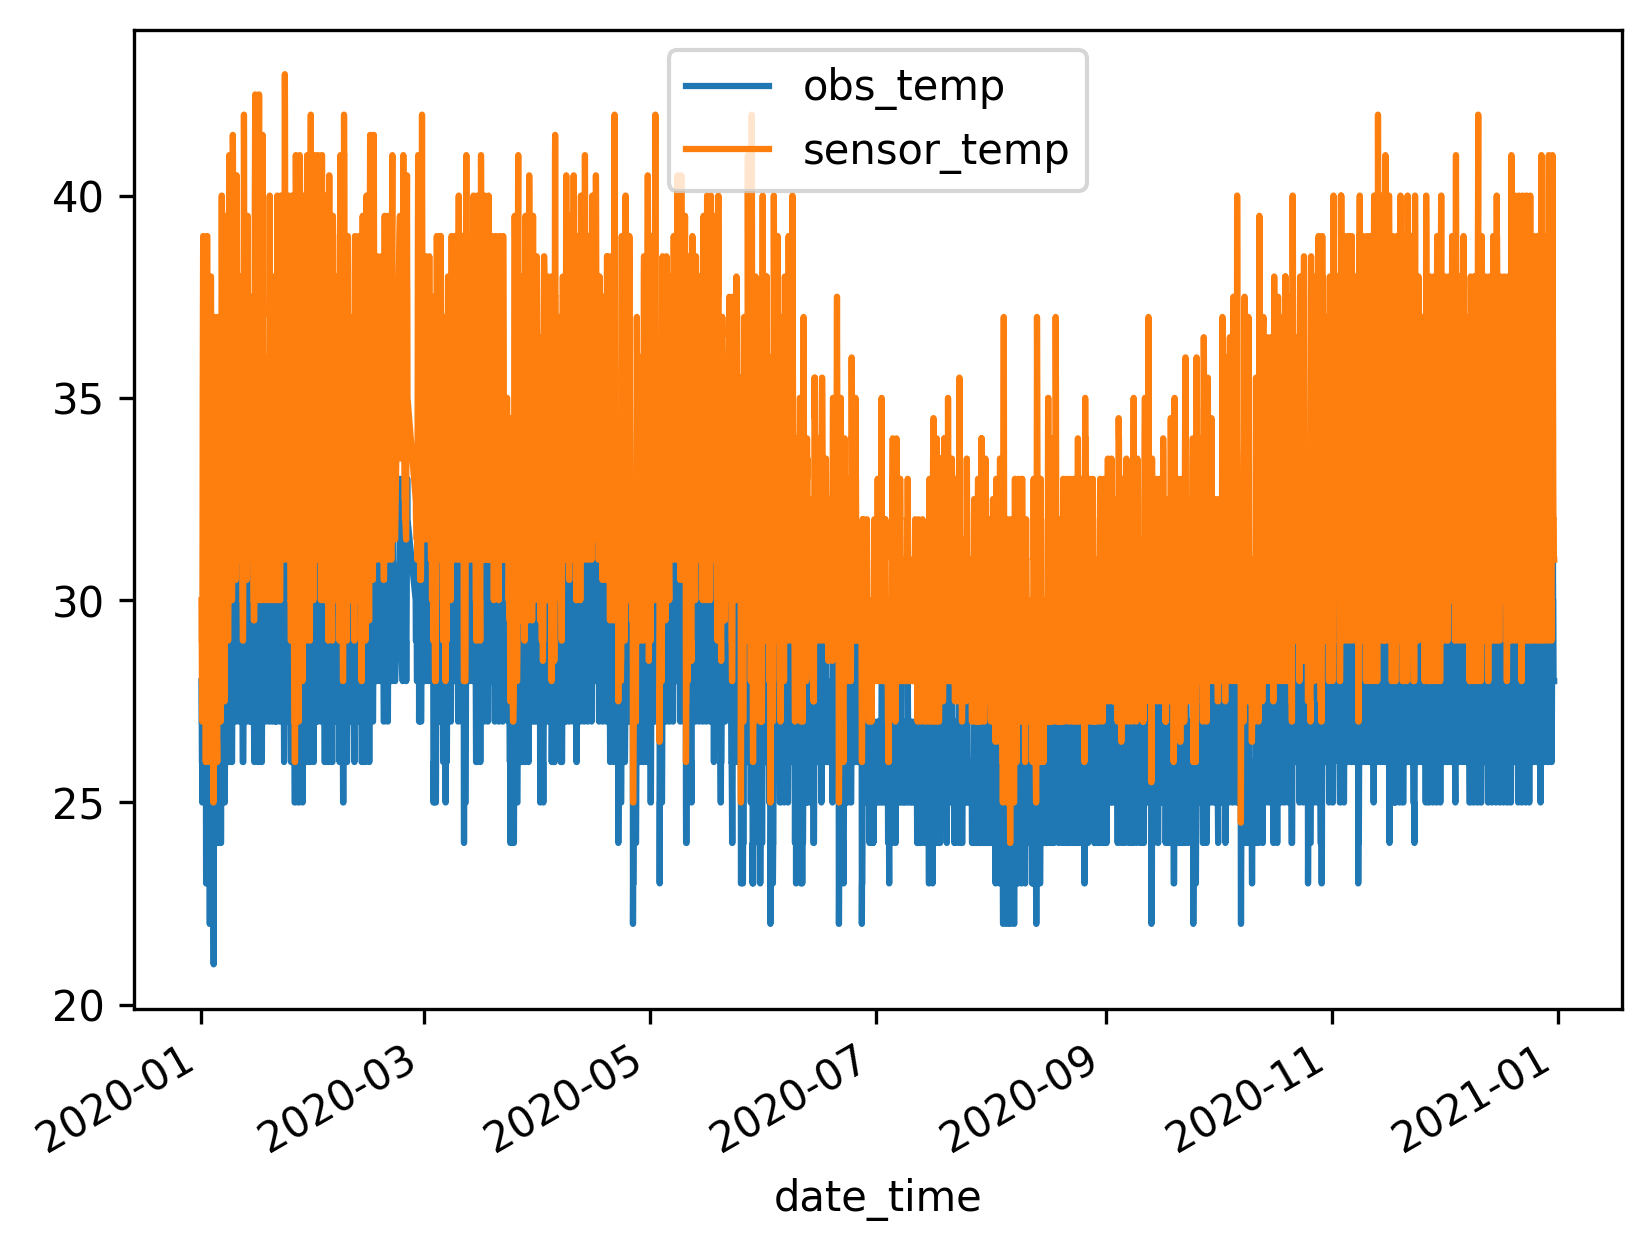

In [ ]:
cleaned_met_aq[['obs_temp','sensor_temp']].plot()

<Axes: xlabel='date_time'>

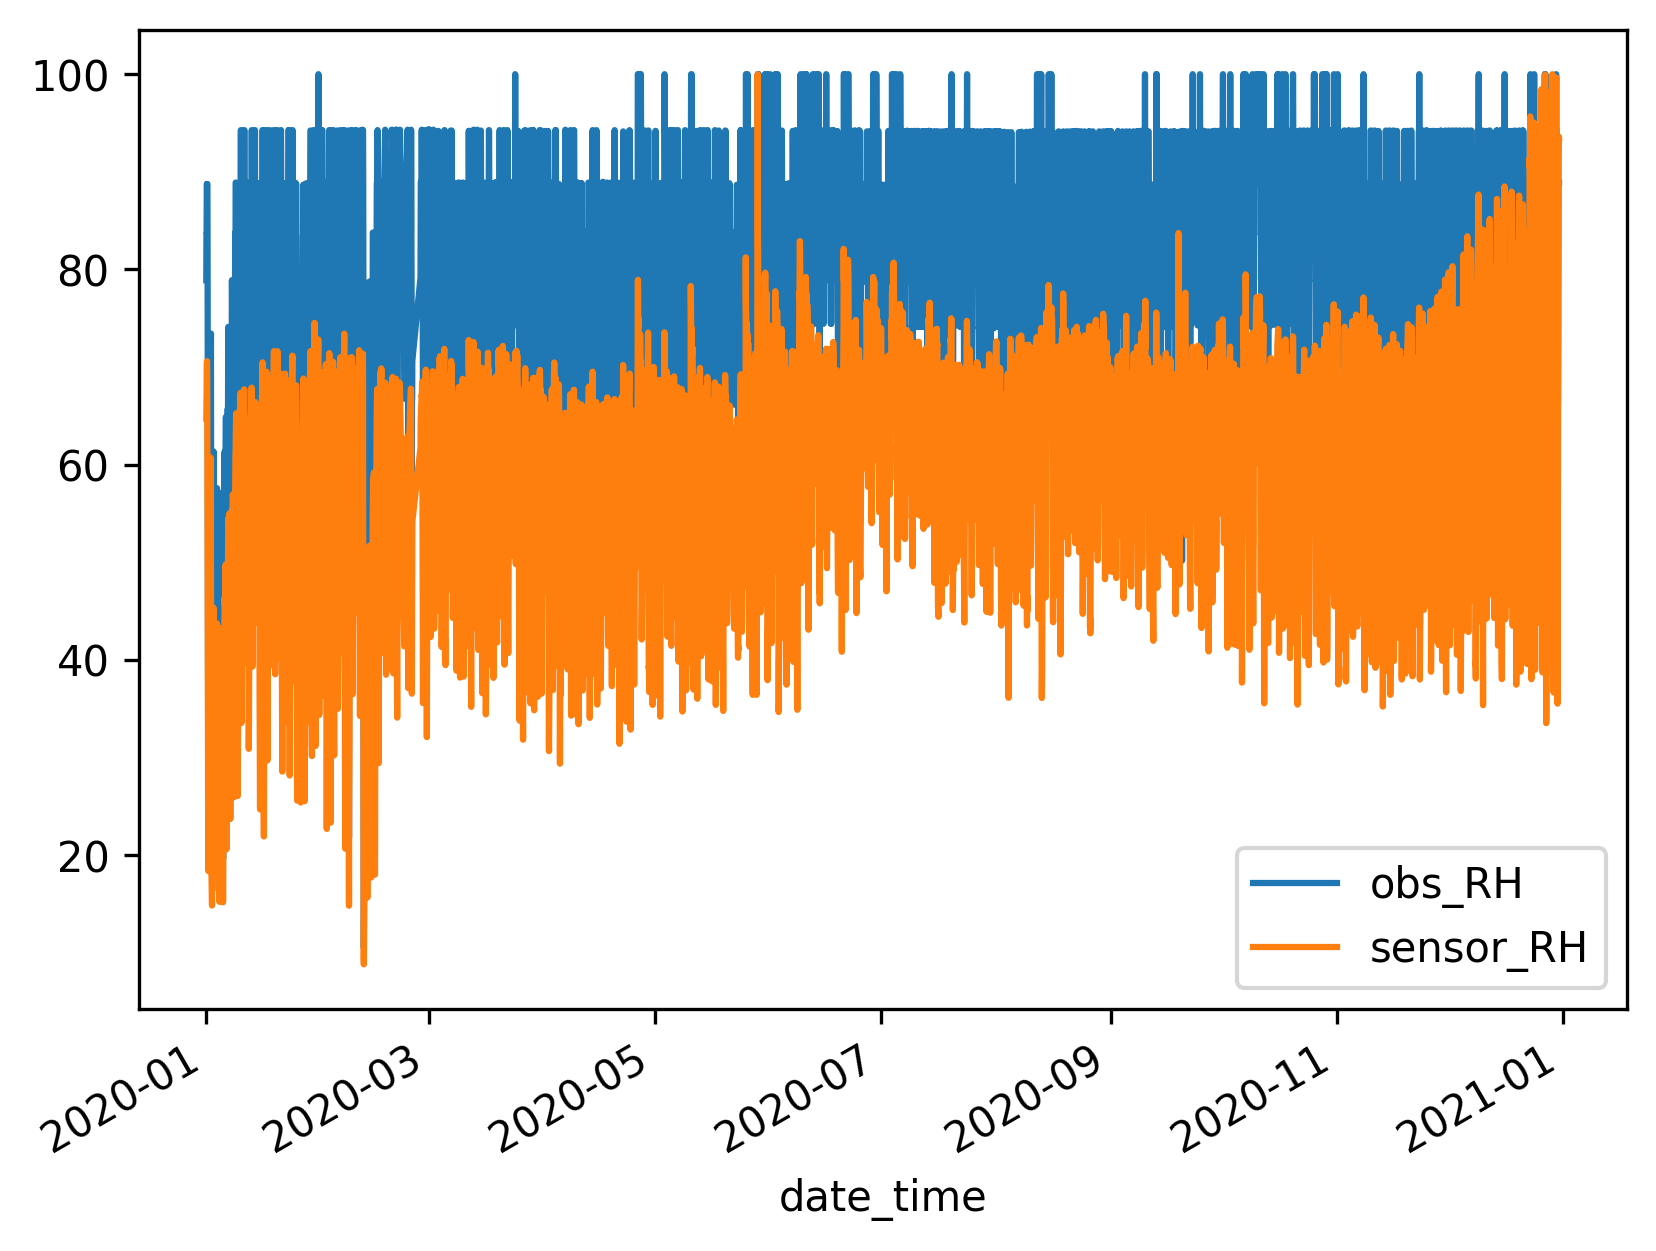

In [ ]:
cleaned_met_aq[['obs_RH','sensor_RH']].plot()

<Axes: xlabel='date_time'>

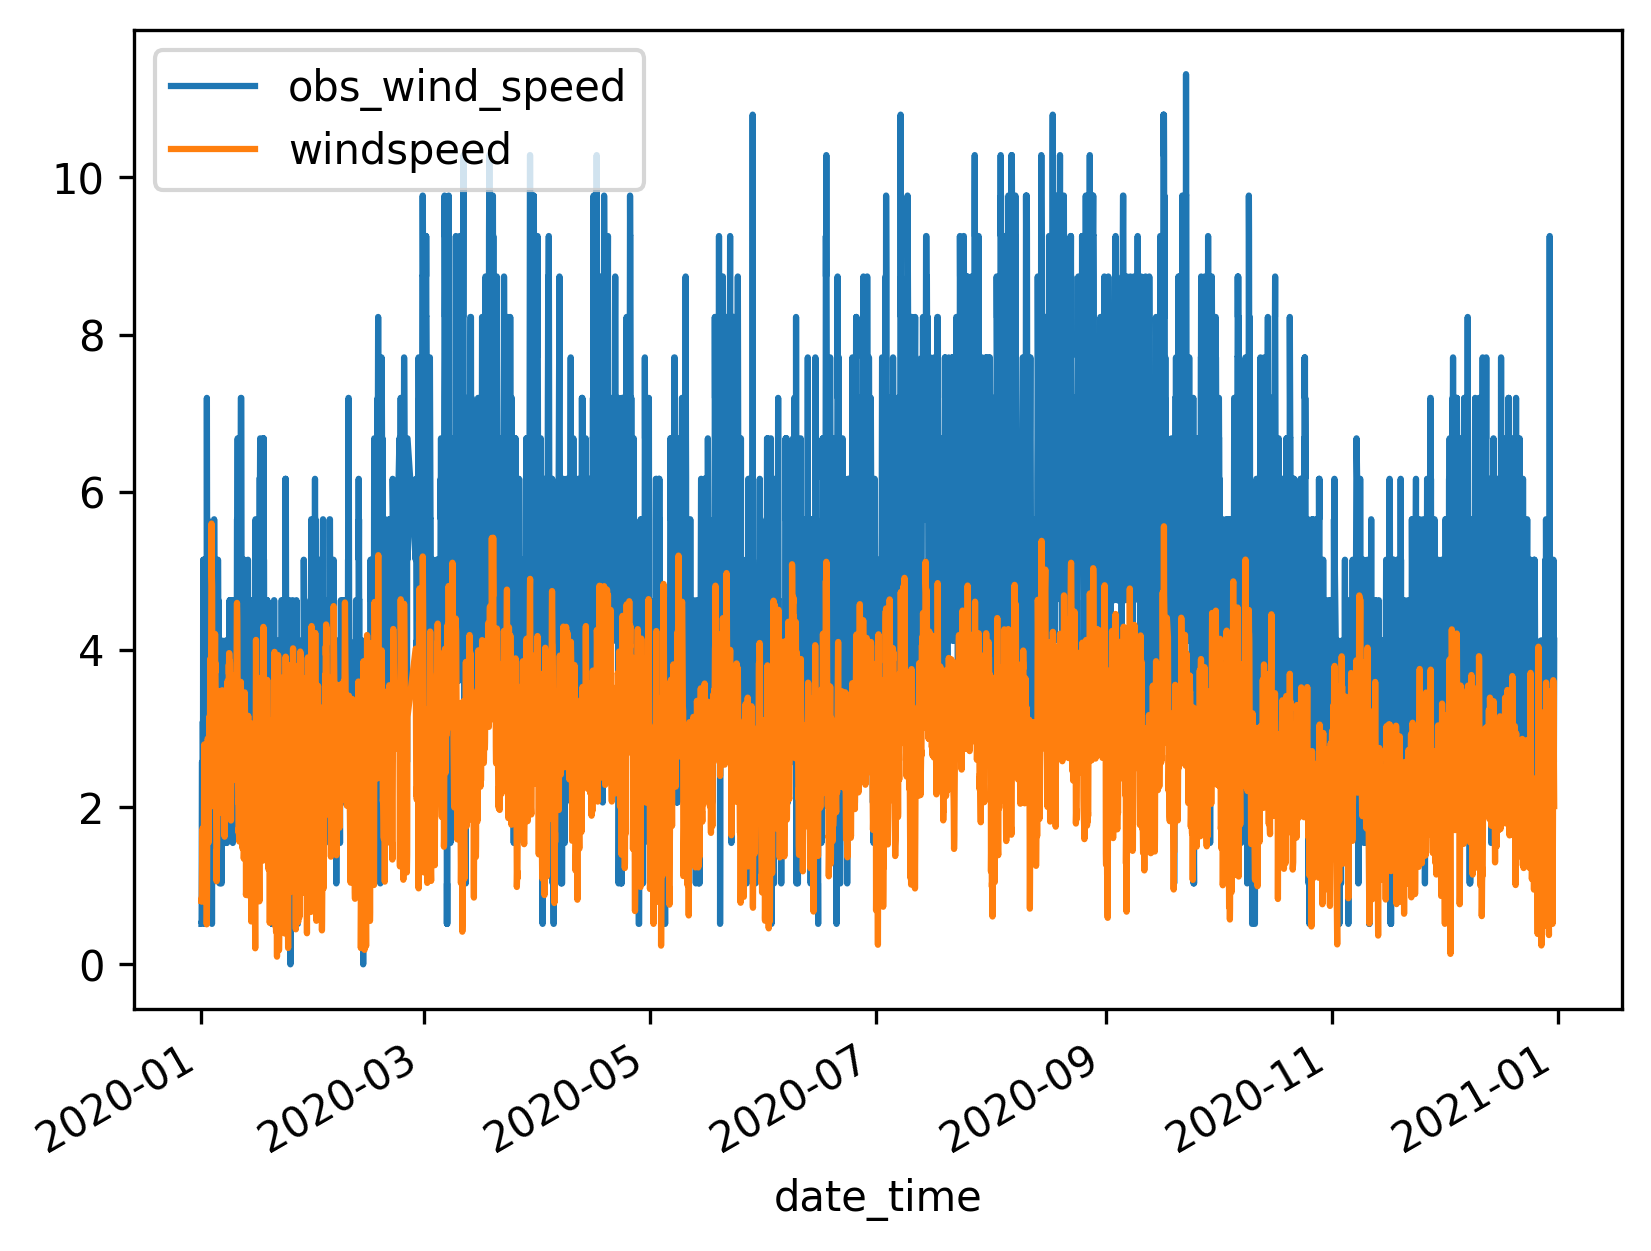

In [ ]:
cleaned_met_aq[['obs_wind_speed','windspeed']].plot()

In [ ]:
cleaned_met_aq.to_csv(out_data_path+'cleaned_met_aq_data.csv', date_format="%d/%m/%Y %H:%M")

<hr />
# <font size=36 color="red">END OF THE DATA CLEANING SESSION.</font>

<hr />
<br /> <br /><br /> <br />
<br /> <br /><br /> <br />

<font size="10" color="red">  PART 2 </font>
<hr />


<font size="10" color="red"> FOR THE SECOND PART, WE WILL DO SOME FURTHER CALCULATIONS AND ANALYSIS OF AIR QUALITY INDEX (AQI).</font>
<hr />

**Air Quality Index Calculation and Analysis**

Do not be afraid about the calculation. These are nothing you will have to do with you head. The codes in this section are designed to help you determine the AQI from pollution data sets. The needed data was pre-processed during the data cleaning section. Another set of functions (AQI_FUNCTIONS) will be used to in this analysis. Below is the importation of packages


In [ ]:
aq_data.drop(columns=['uncorrected_pm25'],inplace=True)
aq_data

**AQI Calculation**

The following lines will do the calculation. Facilitators will explain a little on the procedure but nothing to worry about. The functions used are:

sub_index_calculation - to do a sub indexing of the pollutants

apply_aq_checks - some checks needed for the AQI calculation

apply_aqi_calculation - Where the actual AQI calculation is done

categorize_AQI - Health concern levels are assigned to the calculated AQIs


In [ ]:
aq_data[['SO2','NOx','NH3','CO','O3']] = np.nan          #creating other pollutants columns
aq_data = sub_index_calculation(aq_data) # apply the sub-index calculation by using the function;
aq_data = apply_aq_checks(aq_data)  #apply_aq_check
aq_data = apply_aqi_calculation(aq_data) #apply the aqi calculation using the function apply_aqi_calculation
aq_data["AQI_category"] = aq_data["calculated_AQI"].apply(lambda x: categorize_AQI(x)) #categorizing the calculated AQI
aq_data[~aq_data.calculated_AQI.isna()].head(13)

Some columns can be removed to make handling of the data simple while the columns to be used will be rearrange

In [ ]:
aq_data = aq_data.drop(columns=['SO2','NOx','NH3','CO','O3','SO2_sub_indx',
                                'NOx_sub_indx', 'NH3_sub_indx','CO_sub_indx',
                                'O3_sub_indx','PM2.5_sub_indx','PM10_sub_indx','Checks'])

# rearrange columns
aq_data = aq_data[['year', 'season', 'month_of_year', 'day_of_week', 'day_of_month',
                   'hour_of_day', 'PM2.5_ug/m3', 'PM10_ug/m3','calculated_AQI', 'AQI_category',
                   'obs_temp', 'obs_RH', 'obs_wind_speed','obs_wind_direction', 'wind_direc', 'sensor_temp', 'sensor_RH',
                   'windspeed', 'direction', 'wd']]

aq_data

Some Statistics and real analysis

Now let us do some statistics of the data

We will start with correlation analysis

In [ ]:
aq_data_for_cor = aq_data[['PM2.5_ug/m3', 'PM10_ug/m3',
                           'obs_temp', 'sensor_temp',
                           'obs_RH', 'sensor_RH',
                           'obs_wind_speed','wind_direc',
                           'windspeed', 'wd']]

cor_with_pm25 = aq_data_for_cor.corr(method="spearman")['PM2.5_ug/m3']   #PM25 correlation with other parameters
cor_with_pm25

In [ ]:
plt.figure(figsize=(15,10))
cor_with_pm25.plot.barh()
plt.title('PM2.5 Correlation')
plt.xlabel('correlation')
#plt.savefig(image_path+'correlation_barh_pm25.png')
plt.show()

In [ ]:
cor_with_pm25 = aq_data.corr(method="spearman")
mask = np.triu(np.ones_like(cor_with_pm25, dtype=bool))

plt.figure(figsize=(15,10))
sns.heatmap(round(cor_with_pm25,2),mask=mask, cmap='RdBu', annot=True, annot_kws={"size": 7}, vmin=-1, vmax=1);
#plt.savefig(image_path+'correlation_heatmap1.png')
plt.show()

**Time series plotting of the data**

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x="hour_of_day",y="PM2.5_ug/m3",linewidth=3,data=aq_data,color="red")
plt.ylabel('PM$_{2.5}$ ($\mu$g/m$^3$)',fontsize=17)
plt.xlabel('Hour',fontsize=17)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.savefig(image_path+'diurnal_pm25_timeseries.png')
plt.show()

In [ ]:
#================ TIME SERIES PLOTTING OF DATA =====================================
##=========hourly==========================================================
# series plotting of diurnal variation in meteorological parameters
fig, axs = plt.subplots(4, 1, figsize=(15, 8), sharex=False)
sns.lineplot(
    x="hour_of_day",
    y="obs_temp",
    linewidth=3,
    data=aq_data,
    label="Temperature ($^\circ$C)",
    color="red",
    ax=axs[0],
)
sns.lineplot(
    x="hour_of_day",
    y="obs_RH",
    linewidth=3,
    data=aq_data,
    label="Relative Humidity (%)",
    color="orange",
    ax=axs[1],
)
sns.lineplot(
    x="hour_of_day",
    y="obs_wind_speed",
    linewidth=3,
    data=aq_data,
    label="Wind Speed (m/s)",
    color="blue",
    ax=axs[2],
)
sns.lineplot(
    x="hour_of_day",
    y="PM2.5_ug/m3",
    linewidth=3,
    data=aq_data,
    label="PM2.5 (ug/m3)",
    color="blue",
    ax=axs[3],
)
fig.suptitle("Diurnal variation in meteorological variables", fontsize=20)
axs[0].set_ylabel("Temperature ($^\circ$C)", fontsize=12)
axs[1].set_ylabel("Relative Humidity (%)", fontsize=12)
axs[2].set_ylabel("Wind Speed (m/s)", fontsize=12)
axs[3].set_ylabel("PM2.5 (ug/m3)",fontsize=12)
sns.despine()
#plt.savefig(image_path+'diurnal_met_timeseries.png')
plt.show()

**Plotting of health concerns (AQI levels)**

Facilitators will briefly explain what the levels are

The line if codes below will give a visual of what the data says about the levels in the study area.


In [ ]:
#======== PLOTTING OF HEALTH CONCERNS =====================================
colors = ['green','yellow','orange','red','purple','maroon']
orders = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']
color_dict = dict(zip(orders,colors))

plt.figure(figsize=(10,8))
sns.stripplot(data=aq_data, x="hour_of_day", y="PM2.5_ug/m3",hue='AQI_category',
                hue_order=['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous'],
                palette=color_dict, alpha=0.8)
plt.legend(ncol=2,bbox_to_anchor=(1.0,1.2),fontsize=15)
plt.ylabel('Air Quality Index',fontsize=(18))
plt.xlabel('Hour',fontsize=(18))
plt.xticks(fontsize=(18))
plt.yticks(fontsize=(18))
plt.show()

<hr />
# <font size=36 color="red">END OF THE AQI CALCULATION AND ANALYSIS SESSION.</font>

<hr />
<br /> <br /><br /> <br />
<br /> <br /><br /> <br />

<font size="10" color="red">  PART 2 </font>
<hr />


<font size="10" color="red"> FOR THE THIRD PART, IT WILL BE IDEAL TO WORK IN R. AS SUCH, WE WILL UTILIZE THE R magic IN PYTHON TO ENABLE US RUN THE SCRIPTS HERE ON GOOGLE COLAB.</font>
<hr />

---
# Title: "Air Quality Summer School Data Analysis With R"

### output:
  html_notebook: default <br />
  pdf_document: default

---

This is an [R Markdown](http://rmarkdown.rstudio.com) Notebook. When you execute code within the notebook, the results appear beneath the code.

The codes below helps in analysing air quality data

Below are the required libraries for this section. The Key library is the openair maintain by [David Carslaw](david.carslaw@york.ac.uk)
Visit these [sites](https://davidcarslaw.github.io/openair/) for [more info](https://github.com/davidcarslaw/openair).

You can [Report Bug issues](https://github.com/davidcarslaw/openair/issues) as well.

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(readr)
library(ggplot2)
library(lubridate)
library(data.table)
library(openair)
library(dplyr)
library(zoo)
library(rio)
library(tidyverse)

Attaching package: ‘lubridate’



    date, intersect, setdiff, union



Attaching package: ‘data.table’



    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


Attaching package: ‘dplyr’



    between, first, last



    filter, lag



    intersect, setdiff, setequal, union


Attaching package: ‘zoo’



    as.Date, as.Date.numeric


Use 'install_formats()' to install them



── Attaching core tidyverse packages ─────────────────── tidyverse 2.0.0.9000 ──
✔ forcats 1.0.0     ✔ tibble  3.2.1
✔ purrr   1.0.2     ✔ tidyr   1.3.0
✔ stringr 1.5.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()      masks data.table::between()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks data.table::first()
✖ data.table::hour()    masks lubridate::hour()
✖ data.table::isoweek() masks lubridate::isoweek()
✖ dplyr::lag()          masks stats::lag()
✖ dplyr::last()         masks data.table::last()
✖ data.table::mday()    masks lubridate::mday()
✖ data.table::minute()  masks lubridate::minute()
✖ data.table::month()   masks lubridate::month()
✖ data.table::quarter() masks lubridate::quarter()
✖ data.table::second()  masks lubridate::second()
✖ purrr::transpose()    masks data.table::transpose()
✖ data.table::wday()    masks lubridate::wday()
✖ data.table::week()    masks lubridate::week()
✖ data.t

In [ ]:
%%R
#filepath= 'https://raw.githubusercontent.com/aqppssgh/2023-School/main/AQ_SS_PRACTICALS/DATA/CLEANED_DATA/cleaned_met_aq_data2.csv'
filepath = "DATA/CLEANED_DATA/cleaned_met_aq_data.csv"
df <- import(filepath,header=TRUE,sep = ',', date = 'time',
                  date.format = '%Y/%m%d %H:%M',na.strings = c("-99.0", "-999","-9999",""))
df$date_time <- lubridate::dmy_hm(df$date_time)

Have a *glimpse* of the data

In [ ]:
%%R
glimpse(df)

Rows: 8,127
Columns: 20
$ date_time          <dttm> 2020-01-01 00:00:00, 2020-01-01 01:00:00, 2020-01-…
$ year               <int> 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 202…
$ season             <chr> "winter", "winter", "winter", "winter", "winter", "…
$ month_of_year      <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ day_of_week        <int> 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, …
$ day_of_month       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ hour_of_day        <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1…
$ obs_temp           <dbl> 28, 27, 27, 26, 26, 25, 26, 26, 27, 29, 31, 32, 32,…
$ obs_RH             <dbl> 78.90, 83.66, 83.66, 88.75, 88.75, 88.67, 88.75, 88…
$ obs_wind_speed     <dbl> 0.5140814, 0.5140814, 2.0563254, 2.5704068, 2.57040…
$ obs_wind_direction <chr> "NW", "NW", "NW", "W", "W", "W", "NW", "NW", "N", "…
$ wind_direc         <dbl> 300, 300, 300, 280, 270, 280, 300, 300, 10, 10, 40,…
$ sensor_temp   

Rename some of the columns to be able to work easily with using the *openair library*


In [ ]:
%%R
df2<- rename(df,date = date_time,pm25 = 'PM2.5_ug/m3',pm10='PM10_ug/m3',
             temp=obs_temp,rh=obs_RH,temp2=sensor_temp,rh2=sensor_RH,
             ws=obs_wind_speed,wd2=wd,wd=wind_direc,ws2=windspeed)

The data is in a good form to work around it with the *openair* and functions within it.
The *summaryPlot* function give you a statistical overview of all the variables in the data with timeseries plot attached. The function contains different parameter requirements that can be varied for better view of the data. *eg the avg.time, percentile*


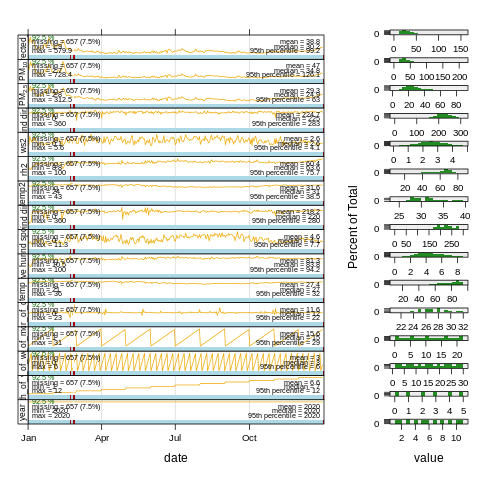

In [ ]:
%%R
summaryPlot(df2,avg.time = 'day')

For a correlation matrices, the *corPlot* function is used. This gives the correlation among all the variables in the dataset.

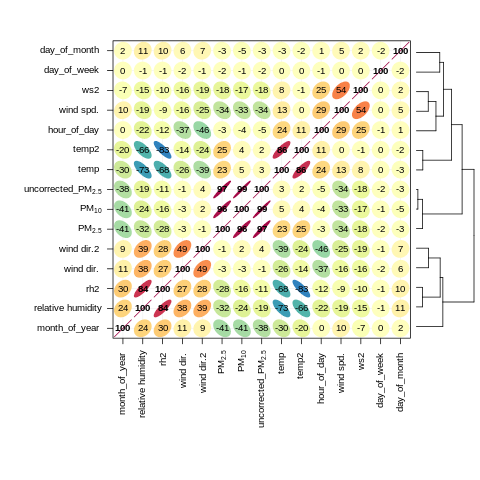

In [ ]:
%%R
corPlot(df2, dendrogram = TRUE)

The following line of codes will evaluate the sensor*(mod)* temperature *(check the column names)*,
the sensor RH *(check the columns name)* against an observed *(obs)* temperature *temp* and RH *rh* data.
The wind components can also be assessed all using the *modStats*.
This can be done at your own time. Try and vary the parameters and make meaning from results

(The function can also be used to evaluate model and reference data)

1St evaluation of temperatures

In [ ]:
%%R
#evaluation of met reference data and sensor data
modStats(df2, obs = "temp", mod = "temp2")

# A tibble: 1 × 12
  default      n  FAC2    MB   MGE   NMB  NMGE  RMSE     r     P   COE     IOA
  <fct>    <int> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>
1 all data  8127     1  4.23  4.23 0.154 0.154  4.65 0.856     0 -1.20 -0.0912


In [ ]:
%%R
#2nd evaluation of RH
modStats(df2, obs = "rh", mod = "rh2")

# A tibble: 1 × 12
  default      n  FAC2    MB   MGE    NMB  NMGE  RMSE     r     P   COE     IOA
  <fct>    <int> <dbl> <dbl> <dbl>  <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>   <dbl>
1 all data  8127 0.996 -20.9  21.0 -0.257 0.258  22.0 0.845     0 -1.22 -0.0989


The *timeVariation* function produces four plots: day of the week variation, mean hour of day variation and a combined hour of day – day of week plot and a monthly plot. Examples are shown for two variables at a time, you can add a third *c("v1","v2","v3")*
This function can be used to compare different pollutants, pollutant from different sites and meteorological parameters.
Vary the parameters and interpret what you see.


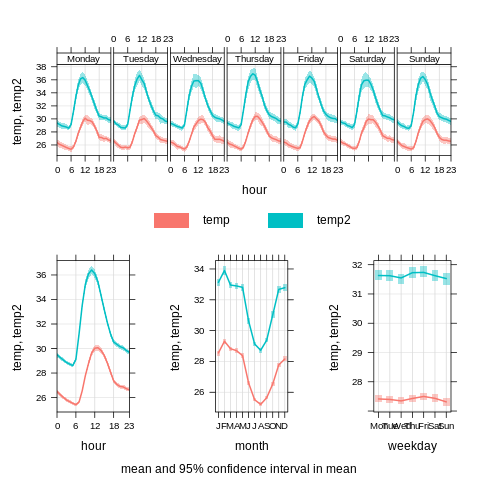

In [ ]:
%%R
timeVariation(df2, pollutant = c("temp", "temp2"), normalise = FALSE)

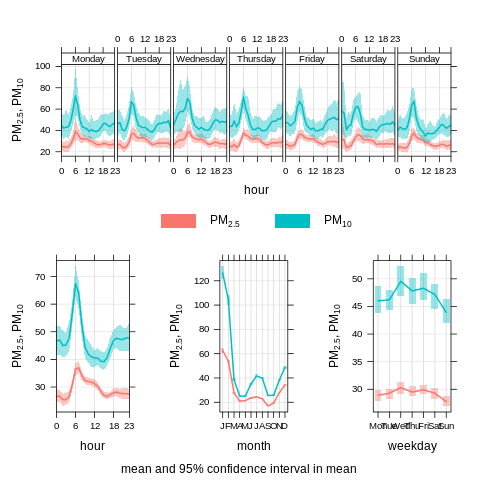

In [ ]:
%%R
timeVariation(df2, pollutant = c("pm25", "pm10"), normalise = FALSE)

A common task in the analysis of air pollution is the comparison of different pollutant levels at the same time and the *timePlot* function is a useful tool for that. The function plots timeseries of pollutants or other variables. Discuss your observation for day and month timesteps.


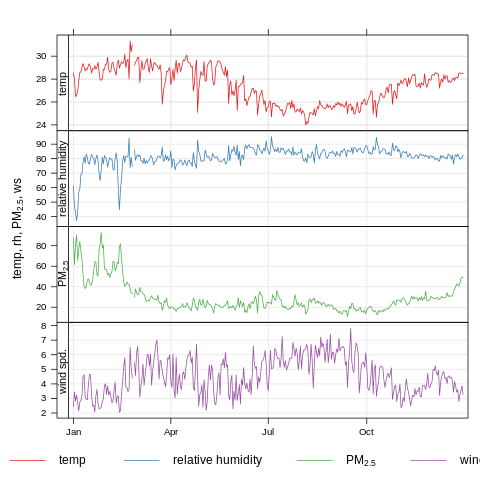

In [ ]:
%%R
timePlot(df2, pollutant =  c("temp", "rh","pm25","ws"),y.relation = "free", avg.time = "day")

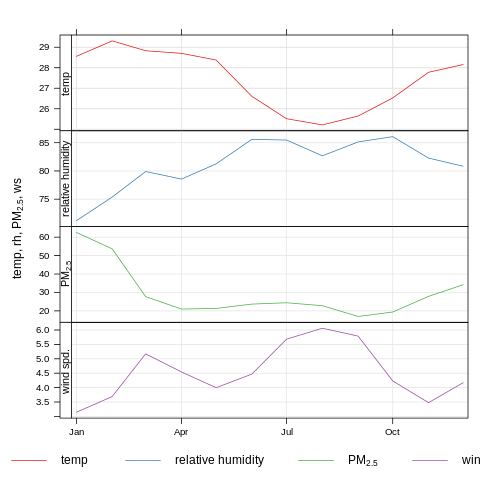

In [ ]:
%%R
timePlot(df2, pollutant =  c("temp", "rh","pm25","ws"),y.relation = "free", avg.time = "month")

The *calendarPlot* function is one of the easy ways to visualize data on a time scale of day and months. This helps you understand variations in air pollution per day for each month in a year.
Discuss your variations

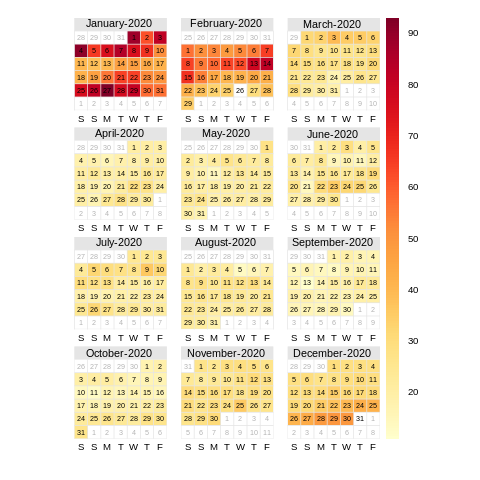

In [ ]:
%%R
calendarPlot(df2, pollutant = "pm25", year =2020)

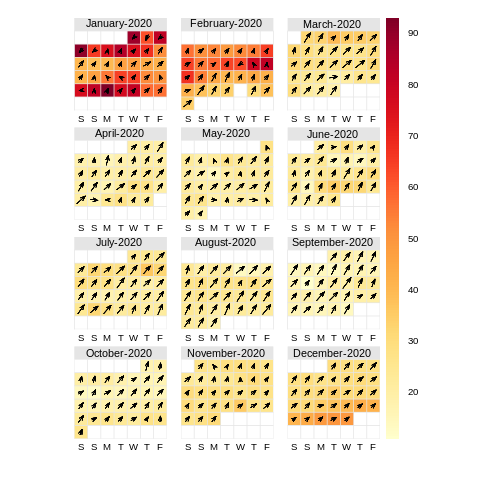

In [ ]:
%%R
calendarPlot(df2, pollutant = "pm25", year = 2020, annotate = "ws")

The WHO threshold for PM2.5 is 15ug/m3, the rest of the break levels were

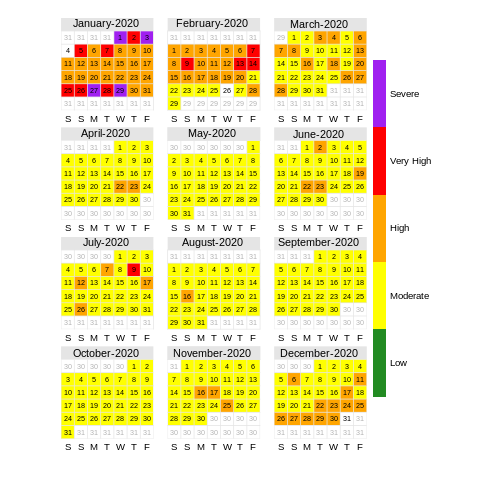

In [ ]:
%%R
calendarPlot(df2, pollutant = "pm25", year = 2020,
             breaks = c(0, 14, 50, 100, 150, 300),
             labels = c("Low", "Moderate", "High", "Very High","Severe"),
             cols = c("forestgreen", "yellow","orange", "red", "purple"),
             statistic = "max")

Understanding variations with the wind speed and direction.
The wind speed and direction are very important components in the analysis of air pollution. These meteorological parameters helps in understanding the transport and trajectory of the air pollutants. A couple of functions *(windRose,pollutionRose, polarPlot and polarFreq)* will be used in this section.
Vary the variables position and interpret your results.



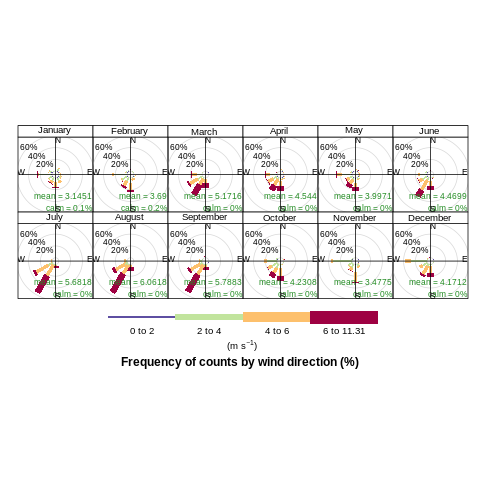

In [ ]:
%%R
#*1st is wind speed and direction according to the months*
windRose(df2,ws='ws',wd='wd', type = "month", layout = c(6, 2))


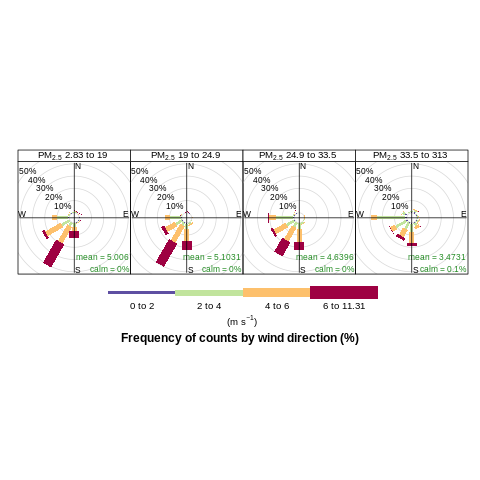

In [ ]:
%%R
#2nd with pollutant* Wind rose for four different levels of PM2.5 concentration The levels are defined as the four quantiles of PM2.5 concentration and the ranges are shown on each of the plot labels
windRose(df2, type = "pm25", layout = c(4, 1))


*pollutionRose* function is a variant of *windRose(used above)* that is useful for considering pollutant concentrations by wind direction, or more specifically the percentage time the concentration is in a particular range.


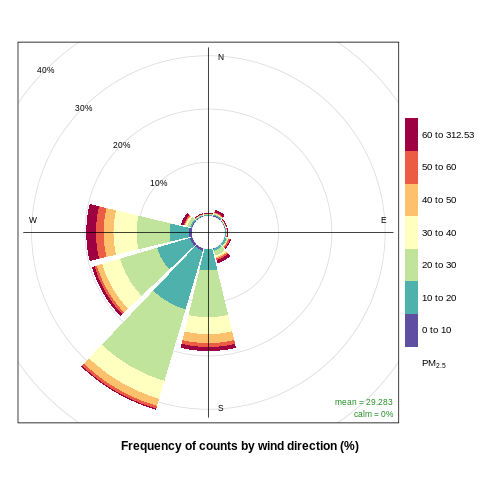

In [ ]:
%%R
pollutionRose(df2, pollutant = "pm25")

Now lets plot using month for type an examine the output

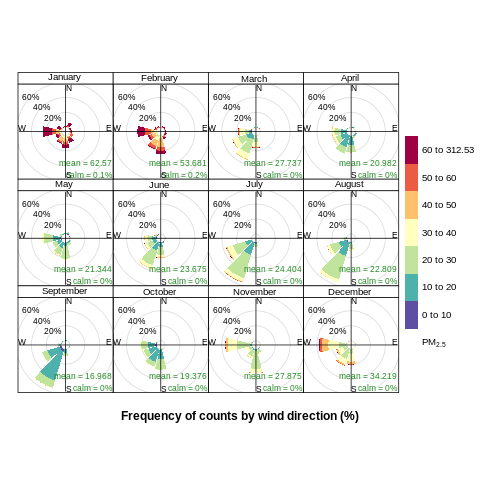

In [ ]:
%%R
pollutionRose(df2, pollutant = "pm25",type='month')

Also, each wind sector can be normalized to give a probability between 0 and 1 to help show the variation within each wind sector more clearly.

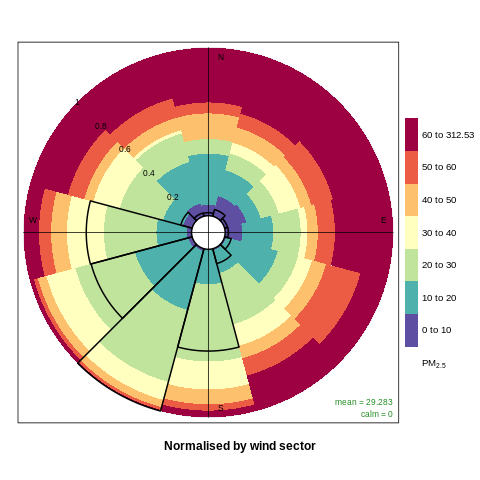

In [ ]:
%%R
pollutionRose(df2, pollutant = "pm25", normalise = TRUE, seg = 1)

Concentrations are shown to vary by wind speed and wind direction. This helps in understanding the prevailing conditions (with respect to wind and direction). You can also change the pollutant and put in a meteorological parameter and see the relationship.


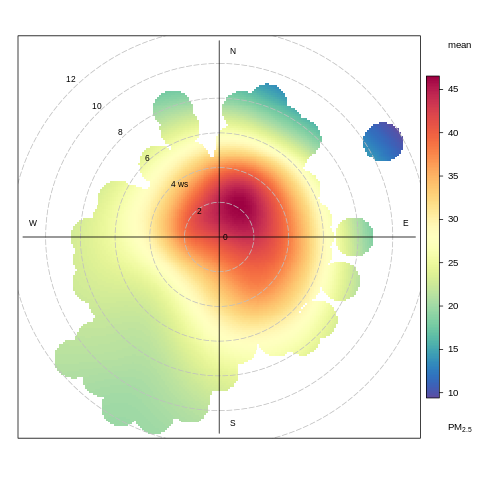

In [ ]:
%%R
polarPlot(df2,pollutant = "pm25",x = "ws",wd = "wd")

This is a custom-made plot to compactly show the distribution of wind speeds and directions from meteorological measurements. It is similar to the traditional wind rose, but includes a number of enhancements to also show how concentrations of pollutants and other variables vary. Each cell gives the total number of hours the wind was from that wind speed/direction in a particular year. The number of hours is coded as a color scale shown to the right.


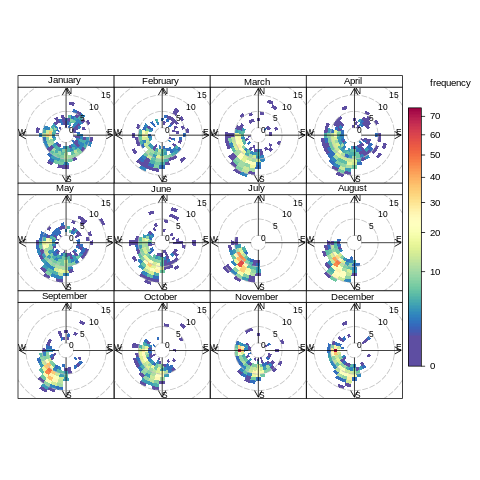

In [ ]:
%%R
polarFreq(df2, type = "month")

For this plot, we are mostly interested in just the contribution by wind direction and not wind speed

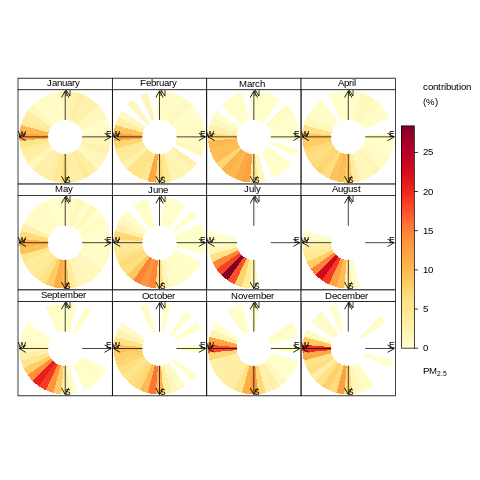

In [ ]:
%%R
polarFreq(df2, pollutant = "pm25", type='month',ws.int = 30, statistic = "weighted.mean",
          offset = 80, trans = FALSE, col = "heat")


**This may be the end of the practical section and the codes for this session but not for your own free time and other data practices. use the links provided to access more information on the openair package and how it can help you.**